In [138]:
# importing required librares
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score,recall_score
from sklearn.naive_bayes import GaussianNB


In [105]:
df1=pd.read_csv("Crop_recommendation.csv")

In [106]:
df1.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
808,13,64,20,19.134577,62.575269,6.590571,36.469470,lentil
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,coconut
1053,93,81,50,27.718225,76.578532,6.036079,102.209984,banana
1194,40,24,25,28.705952,50.440301,5.445008,95.894644,mango
1973,117,51,15,22.953571,78.715558,6.044557,99.753362,cotton


In [107]:
df1['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [108]:
df1.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
220,26,80,83,17.084985,16.145658,7.528600,71.310073,chickpea
797,42,79,23,27.716783,63.291034,6.781842,68.565080,blackgram
1751,33,47,46,29.203009,93.968340,6.839444,209.408331,papaya
1448,117,19,55,28.803119,91.783369,6.121745,25.163599,muskmelon
114,66,54,21,25.190087,60.200169,5.919046,72.123756,maize


# working with crop recomendation

In [109]:
df1.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [110]:
df1.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [111]:
df1.duplicated().sum()

np.int64(0)

In [112]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [113]:
df1.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [114]:
df1.corr(numeric_only=True)


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

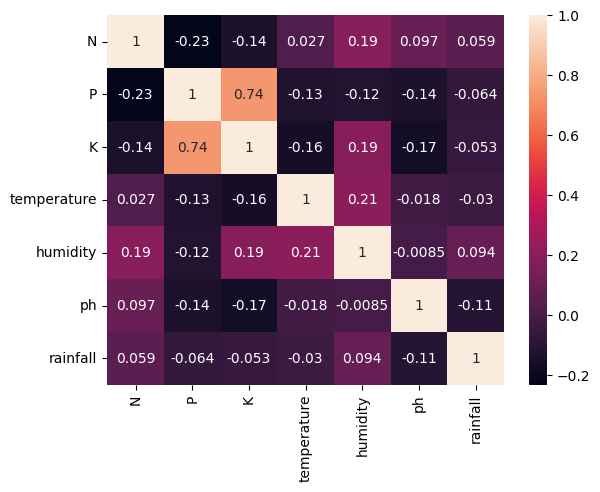

In [115]:
sns.heatmap(df1.corr(numeric_only=True),annot=True)

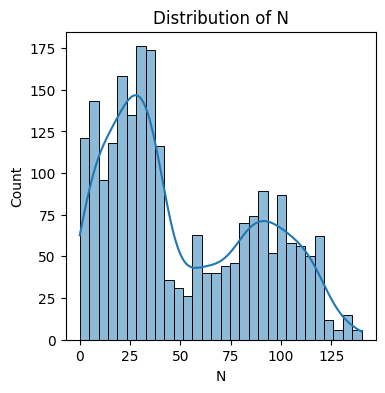

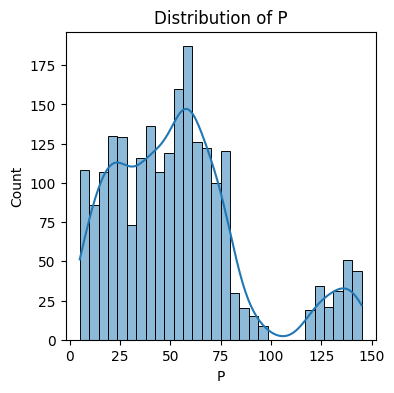

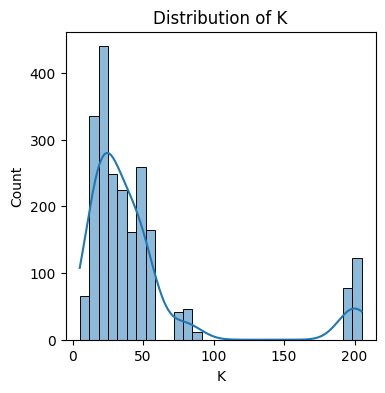

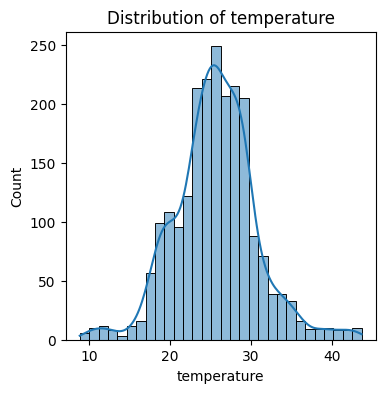

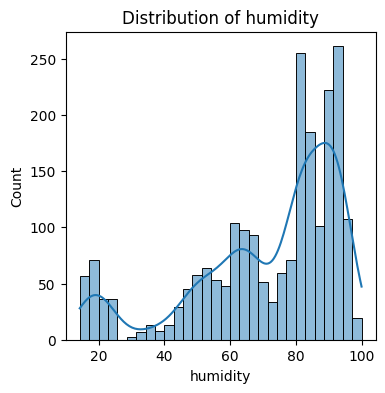

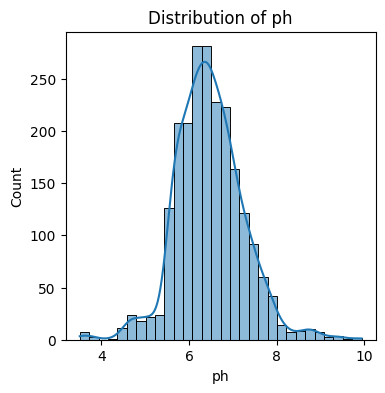

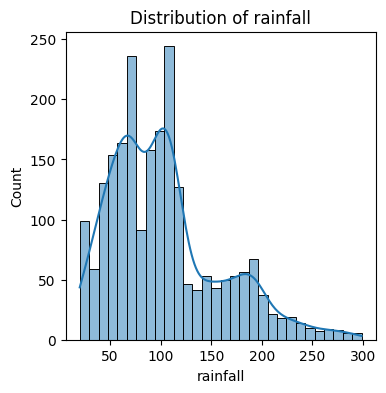

In [116]:
for col in df1.columns[:-1]:
    plt.figure(figsize=(4,4))
    sns.histplot(df1[col],kde=True,bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [117]:
df1.skew(numeric_only=True)


N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

In [118]:

from sklearn.preprocessing import PowerTransformer

# choose only numeric features
num_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

pt = PowerTransformer(method='yeo-johnson')  # works for both +ve and -ve skew
df1[num_cols] = pt.fit_transform(df1[num_cols])

# check skewness again
print(df1[num_cols].skew())



N             -0.129744
P             -0.027591
K             -0.022226
temperature    0.068140
humidity      -0.466314
ph             0.033454
rainfall      -0.012990
dtype: float64


In [119]:
df1.skew(numeric_only=True)

N             -0.129744
P             -0.027591
K             -0.022226
temperature    0.068140
humidity      -0.466314
ph             0.033454
rainfall      -0.012990
dtype: float64

In [120]:
df1.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [127]:
x=df1.iloc[:,0:7]
y=df1['label']

In [129]:
le=LabelEncoder()
y=le.fit_transform(y)

In [130]:
x.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [133]:
x_train.shape

(1760, 7)

In [134]:
x_test.shape

(440, 7)

In [135]:
# scalling
mms=MinMaxScaler()
x_train= mms.fit_transform(x_train)
x_test= mms.fit_transform(x_test)

In [140]:
# traning my model
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [141]:
y_pred=gnb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9681818181818181

accuracy= 0.9681818181818181


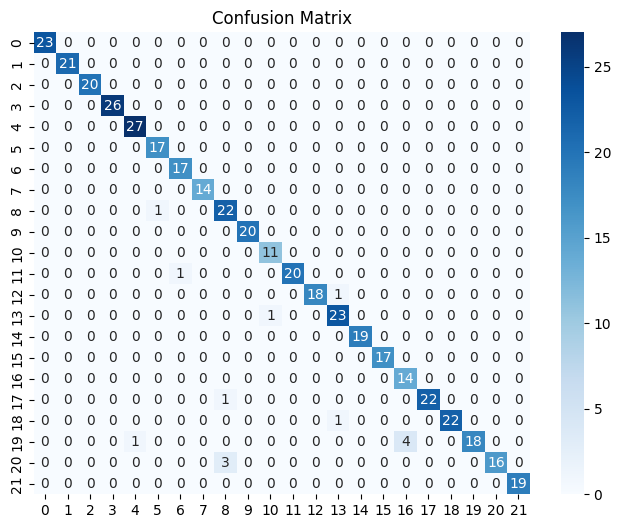

In [142]:
print("accuracy=",accuracy_score(y_test,y_pred)) 
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

accuracy= 0.9272727272727272


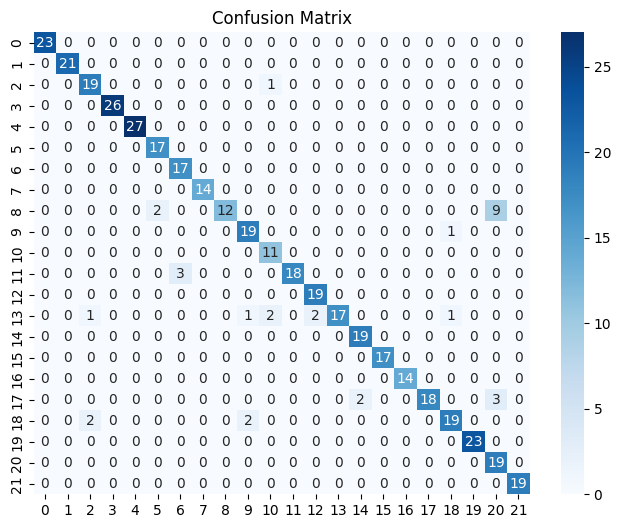

In [139]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("accuracy=",accuracy_score(y_test,y_pred)) 
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()